                    Lisa Rose  Gene Seymour  Michael philips  claudia puig  \
Lady in the water         2.5           3.0              2.5           NaN   
snakes on a plane         3.5           3.5              3.0           3.5   
just my luck              3.0           1.5              NaN           3.0   
superman Returns          3.5           5.0              3.5           4.0   
you,me and dupree         2.5           3.5              NaN           2.5   
the night listener        3.0           3.0              4.0           3.0   

                    mick lasalle  jack mattews  toby  salma  
Lady in the water            3.0           3.0   NaN    2.5  
snakes on a plane            4.0           4.0   4.5    3.5  
just my luck                 2.0           NaN   NaN    3.0  
superman Returns             3.0           5.0   4.0    3.5  
you,me and dupree            2.0           3.5   1.0    2.5  
the night listener           3.0           3.0   NaN    3.0  


posx and posy should be finite values
posx and posy should be finite values


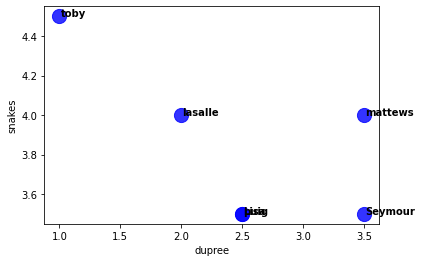

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
critics={'Lisa Rose':{'Lady in the water':2.5,'snakes on a plane':3.5,'just my luck': 3.0,'superman Returns':3.5,
        'you,me and dupree':2.5,'the night listener':3.0
        },
        'Gene Seymour':{'Lady in the water':3.0,'snakes on a plane':3.5,'just my luck':1.5,'superman Returns':5.0,
                        'you,me and dupree':3.5,'the night listener':3.0
        },
        'Michael philips':{'Lady in the water':2.5,'snakes on a plane':3.0,'superman Returns':3.5,'the night listener':4.0
        },
        'claudia puig':{'snakes on a plane':3.5,'just my luck':3.0,'the night listener':3.0,'superman Returns':4.0,'you,me and dupree':2.5,
         },
        'mick lasalle':{'Lady in the water':3.0,'snakes on a plane':4.0,'just my luck':2.0,'superman Returns':3.0,'the night listener':3.0,
                        'you,me and dupree':2.0
        },
        'jack mattews':{'Lady in the water':3.0,'snakes on a plane':4.0,'the night listener':3.0,'superman Returns':5.0,
        'you,me and dupree':3.5
        },
        'toby':{'snakes on a plane':4.5,'you,me and dupree':1.0,'superman Returns':4.0
        },
         'salma':{'Lady in the water':2.5,'snakes on a plane':3.5,'just my luck': 3.0,'superman Returns':3.5,
        'you,me and dupree':2.5,'the night listener':3.0}
        }



 
dff =pd.DataFrame(critics)
print(dff)
snakes=dff.iloc[1:2,:]
list_snakes=snakes.values.tolist()



dupree=dff.iloc[4:5,:]
list_dupree=dupree.values.tolist()


df = pd.DataFrame({
'snakes':[3.5, 3.5, 3. , 3.5, 4. , 4.,  4.5] ,
'dupree':[2.5 ,3.5, None, 2.5 ,2.,  3.5, 1. ] ,
    
'group': ["Lisa","Seymour","philips","puig","lasalle","mattews","toby"]
})


p2=sns.regplot(data=df,x="dupree",y="snakes",fit_reg=False, marker="o", color="blue", scatter_kws={'s':200})
for line in  range(0,df.shape[0]):
    p2.text(df.dupree[line]+0.01, df.snakes[line], df.group[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    


In [9]:
#this figure shows the people charted in the preferences space. the closer two peole are in the preferences space,the more
#similar in their prefrences are
#we can see that toby(snakes:4.5, dupree:1) and lasalle(snakes:4, dupree :2)
#now we are going to calculte the distance betwenn both of them.
#to do that we applicate the following function
from math import sqrt
distance=sqrt(pow(4.5-4,2)+pow(1-2,2))#
print(distance)#1.118033988749895
#this formula calculate the distance which musst be smaller for people who  similar in their taste are
#however , you need a function that gives higher values for peole who are similar this can be by adding one to the function 
#so you don't get a division by zero error
dist=1/(1+distance)#0.4721359549995794
# this function gives a number between 0 und 1 , where the value 0 means that two people have identical preferences


1.118033988749895


In [10]:
#euclidean distance Score
from math import sqrt
def euclidean_distance_score(critics,person1,person2):
    si={}
    for item in critics[person1]:
        if item in critics[person2]:
            si[item]=1
    if(len(si))==0:
        return 0
    euclidean=sum([pow(critics[person1][item]-critics[person2][item],2) for item in si])
    return 1/(1+sqrt(euclidean))

dis_lisa_gene=euclidean_distance_score(critics,'Lisa Rose','Gene Seymour')
dis_lisa_philip=euclidean_distance_score(critics,'Lisa Rose','Michael philips')
dis_lisa_claudia=euclidean_distance_score(critics,'Lisa Rose','claudia puig')
dis_lisa_lasalle=euclidean_distance_score(critics,'Lisa Rose','mick lasalle' )
dis_lisa_mat=euclidean_distance_score(critics,'Lisa Rose','jack mattews')
dis_lisa_toby=euclidean_distance_score(critics,'Lisa Rose','toby')
print("the euclidean distance score between Lisa Rose and Gene Seymour ist: ",dis_lisa_gene)
print("the euclidean distance score between Lisa Rose and Michael philips ist: ",dis_lisa_philip)
print("the euclidean distance score between Lisa Rose and claudia puig ist: ",dis_lisa_claudia)
print("the euclidean distance score between Lisa Rose and mick lasalle ist: ",dis_lisa_lasalle)
print("the euclidean distance score between Lisa Rose and jack mattews ist: ",dis_lisa_mat)
print("the euclidean distance score between Lisa Rose and toby ist: ",dis_lisa_toby)

print("the euclidean distance score between Gene Seymour and Michael philips ist: ",euclidean_distance_score(critics,'Gene Seymour','Michael philips'))
print("the euclidean distance score between Gene Seymour and claudia puig ist: ",euclidean_distance_score(critics,'Gene Seymour','claudia puig'))
print("the euclidean distance score between Gene Seymour and mick lasalle ist: ",euclidean_distance_score(critics,'Gene Seymour','mick lasalle'))
print("the euclidean distance score between Gene Seymour and jack mattews ist: ",euclidean_distance_score(critics,'Gene Seymour','jack mattews'))
print("the euclidean distance score between Gene Seymour  and toby ist: ",euclidean_distance_score(critics,'Gene Seymour','toby'))


print("the euclidean distance score between Michael philips and claudia puig ist: ",euclidean_distance_score(critics,'Michael philips','claudia puig'))
print("the euclidean distance score between Michael philips and mick lasalle ist: ",euclidean_distance_score(critics,'Michael philips','mick lasalle'))
print("the euclidean distance score between Michael philips and jack mattews ist: ",euclidean_distance_score(critics,'Michael philips','jack mattews'))
print("the euclidean distance score between Michael philips  and toby ist: ",euclidean_distance_score(critics,'Michael philips','toby'))


print("the euclidean distance score between claudia puig and mick lasalle ist: ",euclidean_distance_score(critics,'claudia puig','mick lasalle'))
print("the euclidean distance score between claudia puig and jack mattews ist: ",euclidean_distance_score(critics,'claudia puig','jack mattews'))
print("the euclidean distance score between claudia puig  and toby ist: ",euclidean_distance_score(critics,'claudia puig','toby'))


print("the euclidean distance score between mick lasalle and jack mattews ist: ",euclidean_distance_score(critics,'mick lasalle','jack mattews'))
print("the euclidean distance score between mick lasalle  and toby ist: ",euclidean_distance_score(critics,'mick lasalle','toby'))

print("the euclidean distance score between jack mattews  and toby ist: ",euclidean_distance_score(critics,'claudia puig','toby'))


the euclidean distance score between Lisa Rose and Gene Seymour ist:  0.29429805508554946
the euclidean distance score between Lisa Rose and Michael philips ist:  0.4721359549995794
the euclidean distance score between Lisa Rose and claudia puig ist:  0.6666666666666666
the euclidean distance score between Lisa Rose and mick lasalle ist:  0.4142135623730951
the euclidean distance score between Lisa Rose and jack mattews ist:  0.3405424265831667
the euclidean distance score between Lisa Rose and toby ist:  0.3483314773547883
the euclidean distance score between Gene Seymour and Michael philips ist:  0.3405424265831667
the euclidean distance score between Gene Seymour and claudia puig ist:  0.3266316347104093
the euclidean distance score between Gene Seymour and mick lasalle ist:  0.27792629762666365
the euclidean distance score between Gene Seymour and jack mattews ist:  0.6666666666666666
the euclidean distance score between Gene Seymour  and toby ist:  0.25824569976124334
the euclidea

In [11]:
# A slightly more sophisticated algo to determine if two people have identical preferences is pearson correlation score
# the correlation coefficient is a measure of how well two set of data fit on the stright line
#the formula is sophisticaed but it tends to give better result in case not well normilized data sets

[2.76470588 2.90196078 2.35294118 3.31372549 2.90196078 2.76470588]


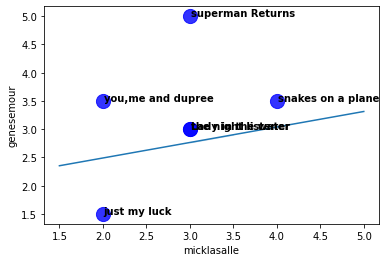

In [12]:
GeneSeymour_item=dff['Gene Seymour'].tolist()
micklasalle_item=dff['mick lasalle'].tolist()
#x=np.aarray(GeneSeymour_item)
y=np.array(micklasalle_item)
x=np.array(GeneSeymour_item)


def rec(x , y ):
    xmean = np.mean(x)
    ymean = np.mean(y)
    a = sum((x-xmean)*(y-ymean))/sum((x-xmean)**2)
    b = ymean - a*xmean
    return (a , b )
a,b = rec(x , y )
a,b
line1=a*x+b
print(line1)



df_item = pd.DataFrame({
'micklasalle':np.array(micklasalle_item) ,
'genesemour':np.array(GeneSeymour_item),
    
'group': ['Lady in the water','snakes on a plane', 'just my luck', 'superman Returns', 'you,me and dupree','the night listener']
})
p2=sns.regplot(data=df_item,x="micklasalle",y="genesemour",fit_reg=False, marker="o", color="blue", scatter_kws={'s':200})
for line in  range(0,df_item.shape[0]):
        p2.text(df_item.micklasalle[line]+0.01, df_item.genesemour[line], df_item.group[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
sns.lineplot(x=x, y=line1)



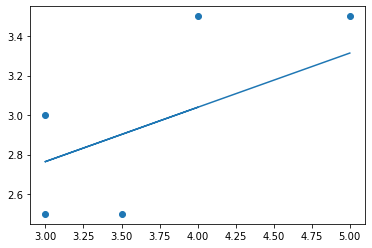

posx and posy should be finite values
posx and posy should be finite values


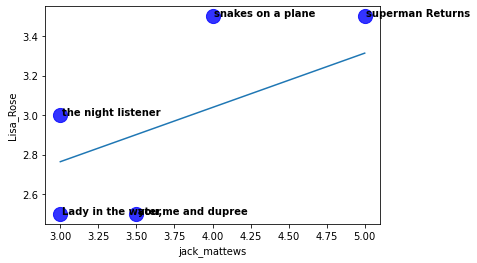

In [13]:
Lisa_Rose_item=dff['Lisa Rose'].tolist()
jackm_attews_item=dff['jack mattews'].tolist()

#x=np.aarray(GeneSeymour_item)
x=np.array(jackm_attews_item)
y=np.array(Lisa_Rose_item)



def rec(x , y ):
    xmean = np.mean(x)
    ymean = np.mean(y)
    a1= sum((x-xmean)*(y-ymean))/sum((x-xmean)**2)
    b1 = ymean - a1*xmean
    return (a , b )
a1,b1 = rec(x , y )
line_lisa_jack=a1*x+b1

plt.scatter(x,y)
plt.plot(x,line_lisa_jack)
plt.show()



df_item = pd.DataFrame({
'jack_mattews':np.array(jackm_attews_item) ,
'Lisa_Rose':np.array(Lisa_Rose_item),
    
'group': ['Lady in the water','snakes on a plane', 'just my luck', 'superman Returns', 'you,me and dupree','the night listener']
})
p2=sns.regplot(data=df_item,x="jack_mattews",y="Lisa_Rose",fit_reg=False, marker="o", color="blue", scatter_kws={'s':200})
for line in  range(0,df_item.shape[0]):
        p2.text(df_item.jack_mattews[line]+0.01, df_item.Lisa_Rose[line], df_item.group[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
sns.lineplot(x=x, y=line_lisa_jack)



In [9]:
#one interesting aspect of using Pearson score as you see it corrects the grade inflation 
# as we see in the figure jack_mattews tends to give higer score than lisa ,
#but the line still fit because they habe similar preferences
#the difference between the score is routinely consistent , 
# pearson correlation score described that that two critics are dissimilar when 
#the difference betwen their score are unconsistent
#

In [14]:
import math 
def sim_pearson(pref,p1,p2):
    si={}
    for item in pref[p1]:
        if item in pref[p2]:
            si[item]=1
    if len(si)==0:
        return 0
    n=len(si)
    sum1=sum([pref[p1][it] for it in si])#sum(s)
    sum2=sum([pref[p2][it] for it in si])#sum(y)
    
    sum1sq=sum([pow(pref[p1][it],2) for it in si])#sum(xpow2)
    sum2sq=sum([pow(pref[p2][it],2) for it in si])#sum(ypow2)
    
    psum=sum([pref[p1][it]*pref[p2][it]for it in si])
    
    nenner= n*(psum)-(sum1)*(sum2)
    zeiler=sqrt((n*sum1sq-pow(sum1,2))*(n*sum2sq-pow(sum2,2)))
    if zeiler ==0:
        return 0
    r=nenner/zeiler
    return r
x=sim_pearson(critics,'Lisa Rose','Gene Seymour')
x_salma_lisa=sim_pearson(critics,'Lisa Rose','salma')
print(x_salma_lisa)
#salma und lisa have exactly the same rating for every items therfore their correlation score is 1
#generally sim_pearson tends to give a value between 1 and -1 1 means that two critics have exactly the same rating for every items
#they have identical preferences with the same rating,otherweise -1 means there is no identical preferences between those two critics


1.0


In [15]:
#actually there are many other metrics to calculate the distance for example(manhattan or jaccard matrics)
#choosing the metrics depends on your application for manhattan is used to calculate distance in google map
#for some metrics higher number means more similar

In [16]:
#Ranking the critcs
def tomatches(prefs,person,n=5,similarity=sim_pearson):
    scores=[(similarity(prefs,person,other),other) for other in prefs if other!=person]
    scores.sort()
    #scores.reverse()# beginnt with the last item , even is n<8
    return scores[0:n]
x=tomatches(critics,'salma',n=5)
print(x)


[(0.39605901719066977, 'Gene Seymour'), (0.40451991747794525, 'Michael philips'), (0.5940885257860046, 'mick lasalle'), (0.747017880833996, 'jack mattews'), (0.9434563530497265, 'claudia puig')]


In [37]:
#finding a good critics to read is great, but what i want is a movie recommendation right now. i could just look at the person whose
# tastes similar to mine and look at the movies he might like, that i haven't seen yet. that would be more permissive
#such an approach could accidentally turn up reviewers who have not reviwéwed some of the movies that i might like , it could also 
# turn up reviwer who strangely liked a movie that got bad reviwes from all the the critics in tomatches
def getrecommendations(prefs,person,similarity=sim_pearson):
    totals={}
    simsum={}
    for other in prefs:
        if other==person : continue
        sim=similarity(prefs,person,other)
        if sim<=0:continue
        for item in prefs[other]:
            if item not in prefs[person] or prefs[person][item]==0:
                totals.setdefault(item,0)
                totals[item]+=prefs[other][item]*sim
                simsum.setdefault(item,0)
                simsum[item]+=sim
    rankings=[(total/simsum[item],item) for item,total in totals.items()]
    rankings.sort()
    
    return rankings
            
    
print(getrecommendations(critics,'toby'))
#conclusion:
#  the purpose from getrecommendation is to is to find your score for each item.
#  one of the most simple way is to look at the person whose tastes similar to yours and from his score you can figure out your scores
#  such an approach have to be more permissive, therfore we shoul apply the following tricks:
#1 with a loop for we should iterate every item in critics 
#2 calculate sim for my specific item with other
#3 and then we do the summation of all similarity
#4 we multiply item's score with the similarity=== > sum of multiplication
#5 and total of sum multiplication(for each item)/ total sim


[(2.642160707342524, 'just my luck'), (2.749119692516404, 'Lady in the water'), (3.0, 'the night listener')]


In [ ]:

# through the function getrecommendation we get not only a ranked list of movies, but we can also guess at what my ration for 
# each movie would be
#  

In [ ]:
# what about products, does it match in the same way like matching people?
# yes , exactly just let us take us example amazon shopping site, particulary when the web site, had collected infos about you, and recommendations should be sent
# for you, in this case we should determine similarity by looking at who liked a particular item
#it's actulayy the same senario like calculation similarity between item
# so let's do that

In [ ]:
# now let us learning how to plot with sckit library